# Import necessary libraries

In [40]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import multiprocessing

# Data import

In [2]:
import os, sys
os.chdir("/media/sieu/VM/GitHub/ML-Vincent-Ng/project")

## File to Pandas Dataframe

Add column names into columns

In [3]:
column_name = []
# Open the file with relative path
with open('./attr.txt', 'r') as infile:
    # Read all data lines as a list of strings
    data_lines = infile.readlines() 

    # Extract each data line
    for ind, line in enumerate(data_lines):
        line_noendl = line[:-1] # remove the last character of string, which is '\n'
        data = line_noendl.split(':') # split the string by tab '\t' to get a tuple 
        column_name.append(data[0])
print(column_name)

['B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99', 'C100', 'C101', 'C102', 'C103', 'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119', 'C120', 'C121', 'C122', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128', 'C129', 'C130', 'C131', 'C132', 'C133', 'C134', 'C135', 'C136', '

Import data to DataFrame

In [4]:
# For experiment
# take 10 minutes
# Should create a new txt file instead for replace ' ' with '\t'
df2 = pd.DataFrame(columns = column_name)
# Open the file with relative path
with open('./train.txt', 'r') as infile:
    # Read all data lines as a list of strings
    data_lines = infile.readlines() 
    with open('./train2.txt', 'w', encoding = 'utf-8') as outfile:
      for column in column_name:
        outfile.write(column)
        outfile.write('\t')
      outfile.write('\n')
      # Extract each data line
      for ind, line in enumerate(data_lines):
        line_noendl = line[:-1] # remove the last character of string, which is '\n'
        data = line_noendl.split('\t') # split the string by tab '\t' to get a tuple 
        append_list = []
        for i in data:
          a = i.split(' ') # additional for removing the ' ' in the dataset
          for j in a:
            if (j!=''):
              append_list.append(j)
        for idx, value in enumerate(append_list):
          outfile.write(value)
          if (idx<len(column_name)-1):
            outfile.write('\t')
        outfile.write('\n')
df2 = pd.read_table('train2.txt', sep = '\t')
df = df2.iloc[:,:-1]

In [5]:
df

,B1,B2,B3,C1,C2,C3,C4,C5,C6,C7,...,CT22,CT23,CT24,CT25,CT26,CH1,CH2,CH3,CH4,Class
0,0,0,1,1.260,1.17,0.720,4.590,0.45,0.765,0.540,...,3,2,2,1,3,0,0,0,0,1
1,0,1,0,0.450,0.81,0.000,0.000,0.00,0.855,0.000,...,3,2,1,1,3,0,0,0,0,1
2,0,0,1,0.540,2.88,0.000,0.000,0.00,0.765,0.000,...,3,2,2,1,3,0,0,0,0,1
3,0,0,1,0.810,1.35,0.450,0.000,0.00,0.000,0.720,...,3,2,2,1,3,0,0,0,0,1
4,0,0,1,0.900,1.17,0.765,0.000,0.00,0.630,0.810,...,4,3,2,1,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,1,0,0.450,1.17,0.630,1.215,0.45,0.990,0.540,...,3,2,2,1,3,0,0,0,0,0
11996,0,1,0,5.085,0.90,0.000,0.000,0.00,0.000,0.945,...,4,3,2,1,3,0,0,0,0,1
11997,0,0,1,1.170,1.71,0.630,0.000,0.00,0.720,0.000,...,3,2,1,1,3,0,0,0,0,0
11998,0,0,1,0.810,1.17,0.000,0.000,0.00,0.990,0.810,...,5,3,2,2,4,0,0,0,0,1


# Clean 

# Remove duplicates, Drop NaN

In [6]:
df = df.drop_duplicates()
df = df.dropna()
df

,B1,B2,B3,C1,C2,C3,C4,C5,C6,C7,...,CT22,CT23,CT24,CT25,CT26,CH1,CH2,CH3,CH4,Class
0,0,0,1,1.260,1.17,0.720,4.590,0.45,0.765,0.540,...,3,2,2,1,3,0,0,0,0,1
1,0,1,0,0.450,0.81,0.000,0.000,0.00,0.855,0.000,...,3,2,1,1,3,0,0,0,0,1
2,0,0,1,0.540,2.88,0.000,0.000,0.00,0.765,0.000,...,3,2,2,1,3,0,0,0,0,1
3,0,0,1,0.810,1.35,0.450,0.000,0.00,0.000,0.720,...,3,2,2,1,3,0,0,0,0,1
4,0,0,1,0.900,1.17,0.765,0.000,0.00,0.630,0.810,...,4,3,2,1,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,1,0,0.450,1.17,0.630,1.215,0.45,0.990,0.540,...,3,2,2,1,3,0,0,0,0,0
11996,0,1,0,5.085,0.90,0.000,0.000,0.00,0.000,0.945,...,4,3,2,1,3,0,0,0,0,1
11997,0,0,1,1.170,1.71,0.630,0.000,0.00,0.720,0.000,...,3,2,1,1,3,0,0,0,0,0
11998,0,0,1,0.810,1.17,0.000,0.000,0.00,0.990,0.810,...,5,3,2,2,4,0,0,0,0,1


# Train and Validation set

In [33]:
train_label = df["Class"].to_numpy()
train_no_label = df.iloc[:,0:df.shape[1]-1].to_numpy()

score is:  0.6522101751459549


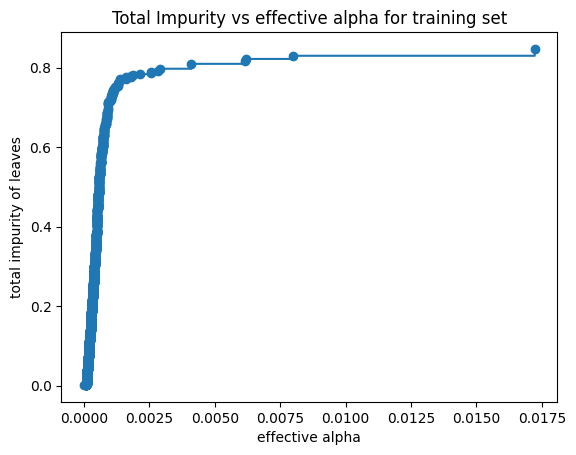

score is:  0.6713928273561302


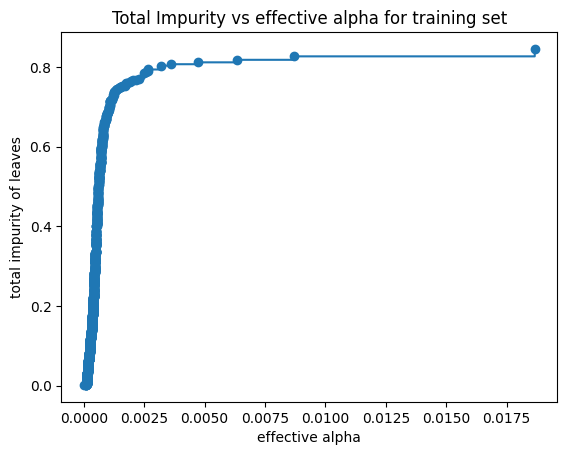

score is:  0.6686143572621035


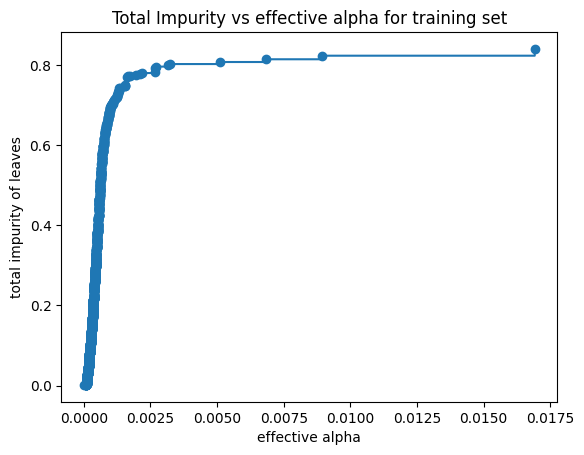

score is:  0.679465776293823


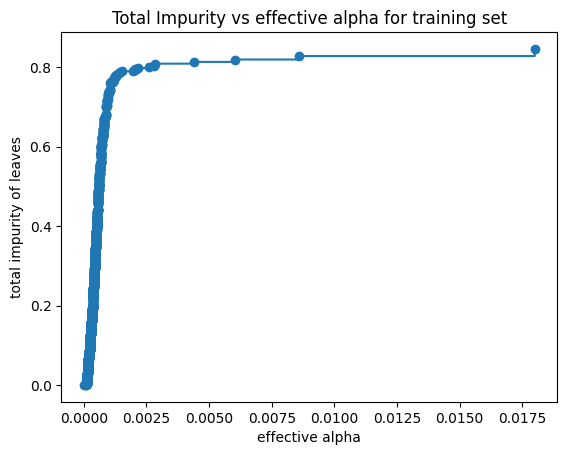

score is:  0.6602671118530885


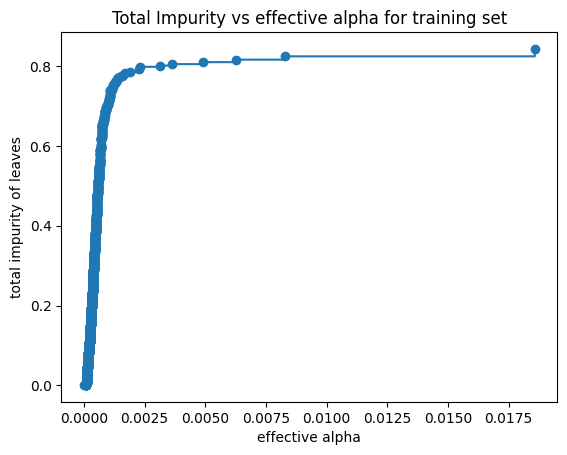

score is:  0.6636060100166945


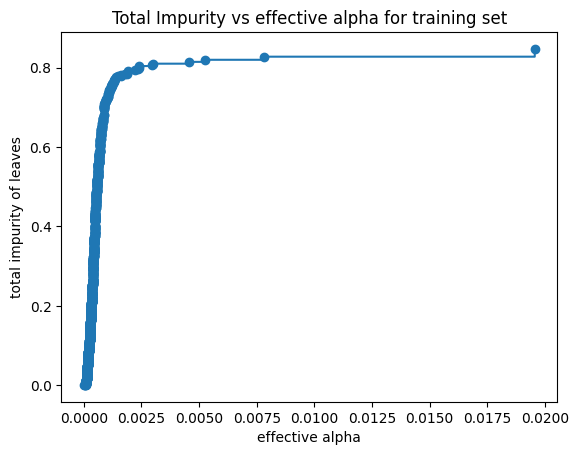

score is:  0.6736227045075125


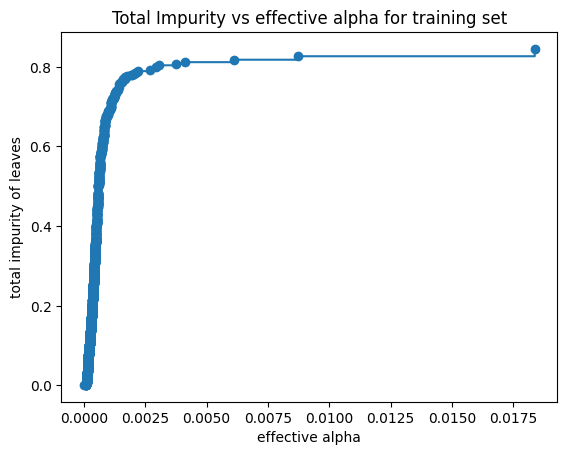

score is:  0.667779632721202


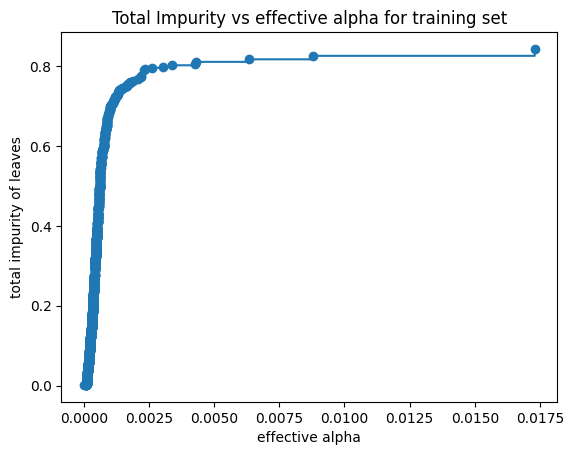

score is:  0.6836393989983306


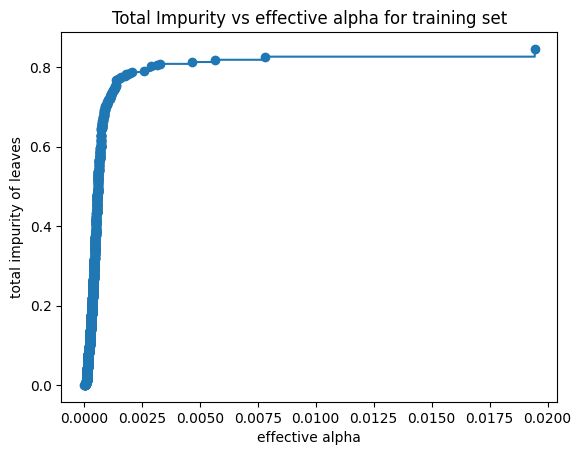

score is:  0.6669449081803005


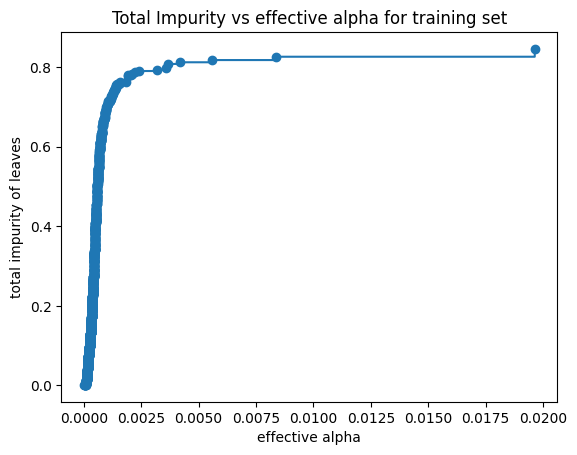

Done


In [42]:

kfold = sklearn.model_selection.KFold(n_splits=10, shuffle=True)
for train_index , test_index in kfold.split(train_no_label):
    X_train, X_test = train_no_label[train_index], train_no_label[test_index]
    y_train, y_test = train_label[train_index], train_label[test_index]
    dtree = sklearn.tree.DecisionTreeClassifier(criterion='entropy')
    dtree.fit(X_train, y_train)
    prediction = dtree.predict(X_test)
    print("score is: ", sklearn.metrics.accuracy_score(y_test, prediction))
    path = dtree.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    fig, ax = plt.subplots()
    ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
    ax.set_xlabel("effective alpha")
    ax.set_ylabel("total impurity of leaves")
    ax.set_title("Total Impurity vs effective alpha for training set")
    plt.show(ax)

print("Done")

# K-Fold 